In [2]:
pip install numpy pandas matplotlib seaborn scikit-learn imbalanced-learn nltk


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 796.8 kB/s eta 0:00:10
   --- ------------------------------------ 0.8/8.1 MB 985.5 kB/s eta 0:00:08
   --- ------------------------------------ 0.8/8.1 MB 985.5 kB/s eta 0:00:08
   ----- ----------

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MANJU\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MANJU\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [1]:
# ==============================
# 🧩 1. Import Required Libraries
# ==============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from imblearn.over_sampling import RandomOverSampler

nltk.download('stopwords')
nltk.download('punkt')




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MANJU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MANJU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# ==============================
# 📥 2. Load Dataset
# ==============================
df = pd.read_csv("CyberBullying Comments Dataset.csv")  # Replace with your dataset file
print("Data loaded successfully!")
df.head()

Data loaded successfully!


,Text,CB_Label
0,damn there is someones nana up here at beach w...,0
1,no kidding! dick clark was a corpse mechanical...,0
2,i read an article on jobros and thought damn w...,0
3,I got one fucking day of sprinkles and now it'...,0
4,I was already listening to Elliott smith and ...,0


In [4]:
# ==============================
# 🧼 3. Preprocessing
# ==============================
stop = stopwords.words('english')
regex = re.compile('[%s]' % re.escape(string.punctuation))
porter_stemmer = PorterStemmer()

def clean_text(text):
    text = ' '.join([word for word in text.split() if word.lower() not in stop])
    text = regex.sub('', text)
    tokens = nltk.word_tokenize(text)
    stemmed = ' '.join([porter_stemmer.stem(w) for w in tokens])
    no_nums = ''.join([i for i in stemmed if not i.isdigit()])
    return no_nums

# Apply preprocessing
df['clean_text'] = df['Text'].apply(clean_text)

In [23]:
# ==============================
# 🔠 4. Feature Engineering (TF-IDF)
# ==============================
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, use_idf=True)
X = tfidf_vectorizer.fit_transform(df['clean_text'])
y = df['CB_Label'].astype(int).values

In [26]:
# ==============================
# 🔀 5. Train-Test Split
# ==============================
X_dense = X.toarray()
X_train, X_test, y_train, y_test = train_test_split(X_dense, y, test_size=0.2, stratify=y, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)


Model: Logistic Regression
Accuracy: 0.731081081081081
Confusion Matrix:
 [[878 232]
 [365 745]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      1110
           1       0.76      0.67      0.71      1110

    accuracy                           0.73      2220
   macro avg       0.73      0.73      0.73      2220
weighted avg       0.73      0.73      0.73      2220


Model: Decision Tree
Accuracy: 0.6617117117117117
Confusion Matrix:
 [[751 359]
 [392 718]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.68      0.67      1110
           1       0.67      0.65      0.66      1110

    accuracy                           0.66      2220
   macro avg       0.66      0.66      0.66      2220
weighted avg       0.66      0.66      0.66      2220


Model: Naive Bayes
Accuracy: 0.5977477477477477
Confusion Matrix:
 [[921 189]
 [704 406]]
Classification R

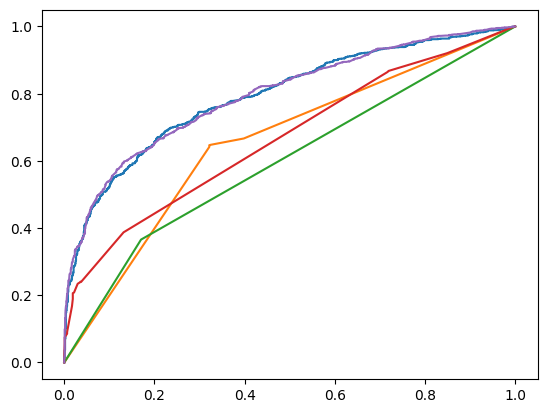

In [ ]:
# ==============================
# 🤖 6. Train Models
# ==============================
def train_and_evaluate(model, name):
    model.fit(X_train_over, y_train_over)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    if hasattr(model, "predict_proba"):
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Models to try
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Run models
for name, model in models.items():
    if name == "Naive Bayes":
        train_and_evaluate(model, name)  # GaussianNB needs dense input
    else:
        train_and_evaluate(model, name)

|||ENSEMBLED CODE SNIPPET|||

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf

In [30]:

# ==============================
# 🤖 6. Train Models
# ==============================
def train_and_evaluate(model, name, X_train, y_train, X_test, y_test, is_deep_learning=False):
    if is_deep_learning:
        # Fit deep learning model
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2)
        y_pred_proba = model.predict(X_test)
        y_pred = (y_pred_proba > 0.5).astype(int).flatten()
        # Compute ROC-AUC for deep learning models
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc = roc_auc_score(y_test, y_pred_proba)
    else:
        # Fit traditional ML model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        if hasattr(model, "predict_proba"):
            fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
            auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
        else:
            fpr, tpr, _ = roc_curve(y_test, y_pred)
            auc = roc_auc_score(y_test, y_pred)

    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return model, y_pred, fpr, tpr, auc

In [31]:
# ==============================
# 🤖 Deep Learning Model Definitions
# ==============================
def create_lstm_model(input_dim, input_length):
    model = Sequential([
        Embedding(input_dim=input_dim, output_dim=100, input_length=input_length),
        LSTM(64, return_sequences=False),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_lstm_gru_model(input_dim, input_length):
    model = Sequential([
        Embedding(input_dim=input_dim, output_dim=100, input_length=input_length),
        LSTM(64, return_sequences=True),
        GRU(32, return_sequences=False),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [32]:

# ==============================
# 🤖 Prepare Data for Deep Learning
# ==============================
# Placeholder for text data tokenization (replace with actual text data, e.g., df['content'])
max_words = 5000  # Vocabulary size
max_len = 100     # Maximum sequence length

tokenizer = Tokenizer(num_words=max_words)
# TODO: Replace with actual text data
# Example: tokenizer.fit_on_texts(df['content'])
# X_train_text = tokenizer.texts_to_sequences(df['content'][train_indices])
# X_test_text = tokenizer.texts_to_sequences(df['content'][test_indices])
# Placeholder sequences (replace with actual tokenized sequences)
X_train_seq = np.random.randint(1, max_words, size=(X_train_over.shape[0], max_len))
X_test_seq = np.random.randint(1, max_words, size=(X_test.shape[0], max_len))
X_train_seq = pad_sequences(X_train_seq, maxlen=max_len)
X_test_seq = pad_sequences(X_test_seq, maxlen=max_len)


Model: Voting Classifier
Accuracy: 0.7301801801801802
Confusion Matrix:
 [[911 199]
 [400 710]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.82      0.75      1110
           1       0.78      0.64      0.70      1110

    accuracy                           0.73      2220
   macro avg       0.74      0.73      0.73      2220
weighted avg       0.74      0.73      0.73      2220



C:\Users\MANJU\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step

Model: LSTM
Accuracy: 0.49414414414414415
Confusion Matrix:
 [[565 545]
 [578 532]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.51      0.50      1110
           1       0.49      0.48      0.49      1110

    accuracy                           0.49      2220
   macro avg       0.49      0.49      0.49      2220
weighted avg       0.49      0.49      0.49      2220

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


C:\Users\MANJU\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step

Model: LSTM + GRU
Accuracy: 0.4900900900900901
Confusion Matrix:
 [[548 562]
 [570 540]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.49      0.49      1110
           1       0.49      0.49      0.49      1110

    accuracy                           0.49      2220
   macro avg       0.49      0.49      0.49      2220
weighted avg       0.49      0.49      0.49      2220

70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step

Ensemble Model (Voting Classifier + LSTM + LSTM + GRU)
Accuracy: 0.5423423423423424
Confusion Matrix:
 [[634 476]
 [540 570]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.57      0.56      1110
           1       0.54      0.51      0.53      1110

    accuracy                           0.54      2220
   macro avg       0.54      0.54      0.54      2220
weighted avg       0.54      0.54      0.54      2220



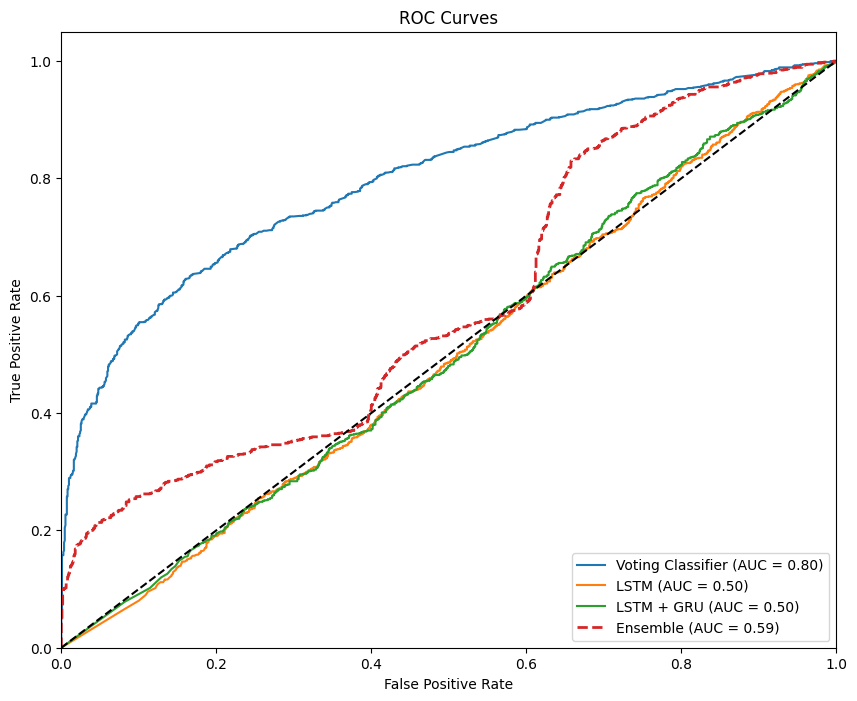

In [33]:

# ==============================
# 🤖 Ensemble Approach
# ==============================
plt.figure(figsize=(10, 8))
trained_models = {}
predictions = {}
probas = {}

# Define Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('ab', AdaBoostClassifier()),
        ('rf', RandomForestClassifier())
    ],
    voting='soft'
)

# Train and evaluate Voting Classifier
trained_voting, y_pred_voting, fpr_voting, tpr_voting, auc_voting = train_and_evaluate(
    voting_clf, "Voting Classifier", X_train_over, y_train_over, X_test, y_test
)
trained_models["Voting Classifier"] = trained_voting
predictions["Voting Classifier"] = y_pred_voting
probas["Voting Classifier"] = trained_voting.predict_proba(X_test)[:,1]
plt.plot(fpr_voting, tpr_voting, label=f"Voting Classifier (AUC = {auc_voting:.2f})")

# Train and evaluate LSTM
lstm_model = create_lstm_model(input_dim=max_words, input_length=max_len)
trained_lstm, y_pred_lstm, fpr_lstm, tpr_lstm, auc_lstm = train_and_evaluate(
    lstm_model, "LSTM", X_train_seq, y_train_over, X_test_seq, y_test, is_deep_learning=True
)
trained_models["LSTM"] = trained_lstm
predictions["LSTM"] = y_pred_lstm
probas["LSTM"] = trained_lstm.predict(X_test_seq).flatten()
plt.plot(fpr_lstm, tpr_lstm, label=f"LSTM (AUC = {auc_lstm:.2f})")

# Train and evaluate LSTM + GRU
lstm_gru_model = create_lstm_gru_model(input_dim=max_words, input_length=max_len)
trained_lstm_gru, y_pred_lstm_gru, fpr_lstm_gru, tpr_lstm_gru, auc_lstm_gru = train_and_evaluate(
    lstm_gru_model, "LSTM + GRU", X_train_seq, y_train_over, X_test_seq, y_test, is_deep_learning=True
)
trained_models["LSTM + GRU"] = trained_lstm_gru
predictions["LSTM + GRU"] = y_pred_lstm_gru
probas["LSTM + GRU"] = trained_lstm_gru.predict(X_test_seq).flatten()
plt.plot(fpr_lstm_gru, tpr_lstm_gru, label=f"LSTM + GRU (AUC = {auc_lstm_gru:.2f})")

# Combine predictions for ensemble
ensemble_predictions = np.array([
    predictions["Voting Classifier"],
    predictions["LSTM"],
    predictions["LSTM + GRU"]
]).T
# Majority voting
ensemble_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=ensemble_predictions)

# Compute ensemble probabilities (average of individual model probabilities)
ensemble_proba = (probas["Voting Classifier"] + probas["LSTM"] + probas["LSTM + GRU"]) / 3
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble_proba)
auc_ensemble = roc_auc_score(y_test, ensemble_proba)

# Evaluate ensemble
print("\nEnsemble Model (Voting Classifier + LSTM + LSTM + GRU)")
print("Accuracy:", accuracy_score(y_test, ensemble_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, ensemble_pred))
print("Classification Report:\n", classification_report(y_test, ensemble_pred))
plt.plot(fpr_ensemble, tpr_ensemble, label=f"Ensemble (AUC = {auc_ensemble:.2f})", linestyle='--', linewidth=2)

# Finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()